In [1]:
import numpy as np
# ^^^ pyforest auto-imports - don't write above this line
#importing libraries
import pyforest
from plotly.offline import init_notebook_mode, iplot

In [2]:
#load the data into dataframe 
df = pd.read_csv("C://Users//Chintu//Downloads//commentary.csv")
df.head()

,over_number,comm,score,match,year,batsman_bowler,bowler,batsman,innings_no,runs,batting_team,bowling_team,result,event
0,19.6,"Chris Morris to Axar, 1 run, widish yorker out...",172.0,rsa-vs-ind-3rd-t20i-india-tour-of-south-africa...,2018,Chris Morris to Axar,Chris Morris,Axar,1,1.0,ind,rsa,1,runs
1,19.5,"Chris Morris to Bhuvneshwar, 3 runs, full toss...",171.0,rsa-vs-ind-3rd-t20i-india-tour-of-south-africa...,2018,Chris Morris to Bhuvneshwar,Chris Morris,Bhuvneshwar,1,3.0,ind,rsa,1,runs
2,19.4,"Chris Morris to Karthik, <b>out</b> Lbw!! Kart...",168.0,rsa-vs-ind-3rd-t20i-india-tour-of-south-africa...,2018,Chris Morris to Karthik,Chris Morris,Karthik,1,0.0,ind,rsa,1,out
3,19.4,"Chris Morris to Karthik, <b>wide</b>, another ...",168.0,rsa-vs-ind-3rd-t20i-india-tour-of-south-africa...,2018,Chris Morris to Karthik,Chris Morris,Karthik,1,1.0,ind,rsa,1,runs
4,19.3,"Chris Morris to Karthik, <b>FOUR</b>, low full...",167.0,rsa-vs-ind-3rd-t20i-india-tour-of-south-africa...,2018,Chris Morris to Karthik,Chris Morris,Karthik,1,4.0,ind,rsa,1,runs


In [3]:
#Dataframe info and column datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6781 entries, 0 to 6780
Data columns (total 14 columns):
over_number       6781 non-null float64
comm              6781 non-null object
score             6781 non-null float64
match             6781 non-null object
year              6781 non-null int64
batsman_bowler    6781 non-null object
bowler            6781 non-null object
batsman           6781 non-null object
innings_no        6781 non-null int64
runs              6781 non-null float64
batting_team      6781 non-null object
bowling_team      6781 non-null object
result            6781 non-null int64
event             6781 non-null object
dtypes: float64(3), int64(3), object(8)
memory usage: 741.8+ KB


###  1) Number of matches played by India. 

In [4]:
batting_df=df[df['batting_team']=='ind']
num = len(batting_df['match'].unique())
print("Total no. of matches India played:",num)

Total no. of matches India played: 28


### 2) Number of T20's India played every year. 

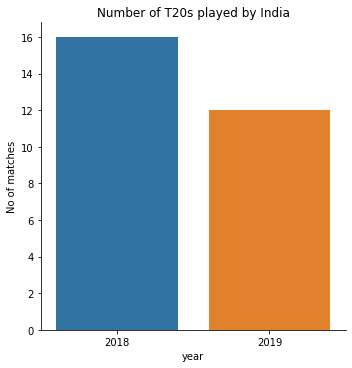

In [5]:
num_matches = df.groupby(['year']).apply(lambda x:x['match'].nunique()).reset_index(name = 'No of matches')
%matplotlib inline
sns.catplot(x="year", y="No of matches", kind="bar", data=num_matches).set(title = 'Number of T20s played by India')

### 3) Team Average Score (Batting First & Second).

In [23]:
score = batting_df.groupby(['year','match','innings_no']).apply(lambda x:x['runs'].sum()).reset_index(name='score')
print("Batting First Average score:",np.median(score[score['innings_no']==1]['score'].values))
print("Batting Second Average score:",np.median(score[score['innings_no']==2]['score'].values))

<IPython.core.display.Javascript object>

Batting First Average score: 185.0


<IPython.core.display.Javascript object>

Batting Second Average score: 160.0


### 4) Team Average Innings wise over the years.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

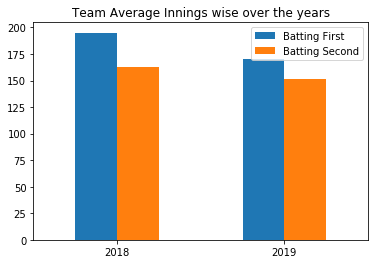

In [42]:
#Split the above score dataframe
first_innings_df=score[score['innings_no']==1]
second_innings_df=score[score['innings_no']==2]

df1=first_innings_df.groupby('year').apply(lambda x:np.median(x['score'].values)).reset_index(name='score')
df2=second_innings_df.groupby('year').apply(lambda x:np.median(x['score'].values)).reset_index(name='score')

data = {"Batting First": df1['score'].values,
"Batting Second":df2['score'].values
}

index = df1['year'].values

# Dictionary loaded into a DataFrame 
dataFrame = pd.DataFrame(data=data, index=index)

dataFrame.plot(kind = 'bar', title = 'Team Average Innings wise over the years', rot = 0)

from the above graph we can infer, that the Batting Average of Indian team is high when batting first. 

### 5) Overall Winning % (Batting First & Second).

In [57]:
grp = batting_df.groupby('match').first().reset_index()
matches_won = grp[grp['innings_no'] == grp['result']]
print("Over all Winning %:",(matches_won.shape[0]/num)*100)

#Batting first & second
first  = grp[grp['innings_no'] == 1]
second = grp[grp['innings_no'] == 2]

#Batting first winning %
won1 = first[first['innings_no'] == first['result']]
print("Batting First Winning % :",(won1.shape[0]/first.shape[0])*100)

#Batting secong winning %
won2 = second[second['innings_no'] == second['result']]
print("Batting Second Winning % :",(won2.shape[0]/second.shape[0])*100)

Over all Winning %: 67.85714285714286
Batting First Winning % : 50.0
Batting Second Winning % : 85.71428571428571


From the above result, we can infer Indian team has better winning % in chasing (batting second)

### 6) Winning % against different teams.

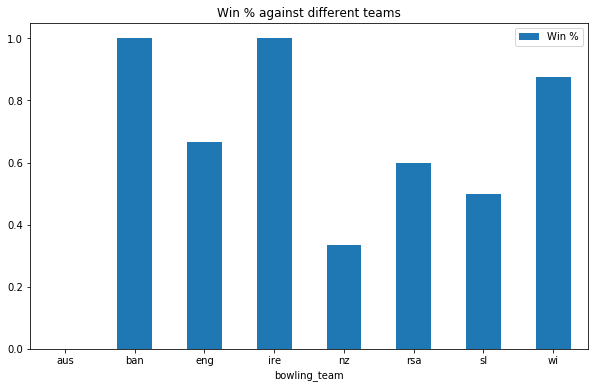

In [69]:
df1 = grp.groupby('bowling_team').apply(lambda x:x.shape[0]).reset_index(name='no')
df2=grp.groupby('bowling_team').apply(lambda x: x[x['innings_no']==x['result']].shape[0]).reset_index(name='won')
df2['Win %']=df2['won']/df1['no']
fig=df2.plot.bar(x="bowling_team", y="Win %", rot=0, title="Win % against different teams",figsize=(10,6)).get_figure()

India wins almost all the matches when playing against Bangladesh and Ireland